In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
path = "/content/drive/MyDrive/PIP 2025/Rendu Final/Problématique 4/#conso_dpe_pb4.csv"
path2 = "/content/drive/MyDrive/PIP 2025/Rendu Final/Problématique 4/conso_dpe_pb4_net.csv"

Mounted at /content/drive/


In [ ]:
# prompt: ouvrir le fichier avec chunck car trop volumineux

import pandas as pd

chunksize = 10000  # Adjust chunksize as needed

# Use a list to store the data from each chunk
all_chunks = []

for chunk in pd.read_csv(path, chunksize=chunksize):
  all_chunks.append(chunk)
  # You can process each chunk here if needed

# Concatenate all chunks into a single DataFrame if necessary
dpe_conso = pd.concat(all_chunks)

In [ ]:
dpe_conso.head()

,Type_bâtiment,Type_installation_ECS_(général),Hauteur_sous-plafond,Nombre_appartement,Nombre_niveau_logement,Surface_habitable_logement,Classe_inertie_bâtiment,Classe_altitude,Zone_climatique_,Score_BAN,Deperditions_baies_vitrées,Deperditions_planchers_bas,Déperditions_ponts_thermiques,Déperditions_portes,Qualité_isolation_enveloppe,Qualité_isolation_menuiseries,Qualité_isolation_murs,Qualité_isolation_plancher_bas,Ubat_W/m²_K,Besoin_chauffage,Configuration_installation_chauffage_n°1,Type_installation_chauffage_n°1,Surface_chauffée_installation_chauffage_n°1,Type_émetteur_installation_chauffage_n°1,Type_générateur_n°1_installation_n°1,Usage_générateur_n°1_installation_n°1,Configuration_installation_ECS,Type_installation_ECS,Nombre_logements_desservis_par_installation_ECS,Etiquette_DPE,Nom__commune_(BAN),Nom__rue_(BAN),N°_voie_(BAN),Année,Code IRIS,Nom IRIS,Numéro de voie,Indice de répétition,Type de voie,Libellé de voie,Code Commune,Nom Commune,Segment de client,Nombre de logements,Consommation annuelle totale de l'adresse (MWh),Consommation annuelle moyenne par logement de l'adresse (MWh),Consommation annuelle moyenne de la commune (MWh),Adresse,Code EPCI,Code Département,Code Région,Tri des adresses
0,APPARTEMENT,COLLECTIF,2.5,90.0,1.0,45.3,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,BONNE,TRÈS BONNE,TRÈS BONNE,BONNE,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AURIOL,IMPASSE NOTRE DAME,8.0,2023,130070103,SUD,8,NaN,IMPASSE,NOTRE DAME,13007,AURIOL,RESIDENTIEL,87,87.171,1.002,6.384,8 IMPASSE NOTRE DAME,200054807.0,13,93,25024
1,APPARTEMENT,COLLECTIF,2.5,90.0,1.0,60.8,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,BONNE,TRÈS BONNE,TRÈS BONNE,BONNE,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AURIOL,IMPASSE NOTRE DAME,8.0,2023,130070103,SUD,8,NaN,IMPASSE,NOTRE DAME,13007,AURIOL,RESIDENTIEL,87,87.171,1.002,6.384,8 IMPASSE NOTRE DAME,200054807.0,13,93,25024
2,APPARTEMENT,COLLECTIF,2.5,90.0,1.0,54.4,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,BONNE,TRÈS BONNE,TRÈS BONNE,BONNE,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AURIOL,IMPASSE NOTRE DAME,8.0,2023,130070103,SUD,8,NaN,IMPASSE,NOTRE DAME,13007,AURIOL,RESIDENTIEL,87,87.171,1.002,6.384,8 IMPASSE NOTRE DAME,200054807.0,13,93,25024
3,APPARTEMENT,COLLECTIF,2.5,90.0,1.0,41.7,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,BONNE,TRÈS BONNE,TRÈS BONNE,BONNE,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AURIOL,IMPASSE NOTRE DAME,8.0,2023,130070103,SUD,8,NaN,IMPASSE,NOTRE DAME,13007,AURIOL,RESIDENTIEL,87,87.171,1.002,6.384,8 IMPASSE NOTRE DAME,200054807.0,13,93,25024
4,APPARTEMENT,COLLECTIF,2.5,90.0,1.0,73.8,NaN,NaN,NaN,0.96,NaN,NaN,NaN,NaN,BONNE,TRÈS BONNE,TRÈS BONNE,BONNE,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,AURIOL,IMPASSE NOTRE DAME,8.0,2023,130070103,SUD,8,NaN,IMPASSE,NOTRE DAME,13007,AURIOL,RESIDENTIEL,87,87.171,1.002,6.384,8 IMPASSE NOTRE DAME,200054807.0,13,93,25024


#### Sélection des variables importantes

In [ ]:
colonnes_select = [
    "Type_bâtiment", "Type_installation_ECS_(général)", "Hauteur_sous-plafond",
    "Nombre_appartement", "Nombre_niveau_logement", "Surface_habitable_logement", "Classe_inertie_bâtiment",
    "Classe_altitude", "Zone_climatique_", "Score_BAN", "Deperditions_baies_vitrées", "Deperditions_planchers_bas",
    "Déperditions_portes", "Qualité_isolation_enveloppe",
    "Qualité_isolation_menuiseries", "Qualité_isolation_murs", "Qualité_isolation_plancher_bas", "Ubat_W/m²_K",
    "Besoin_chauffage",
    "Configuration_installation_chauffage_n°1", "Type_installation_chauffage_n°1", "Type_émetteur_installation_chauffage_n°1",
    "Type_générateur_n°1_installation_n°1", "Usage_générateur_n°1_installation_n°1",  "Configuration_installation_ECS",
    "Type_installation_ECS", "Nombre_logements_desservis_par_installation_ECS", "Consommation annuelle moyenne par logement de l'adresse (MWh)",
    "Etiquette_DPE","Adresse","Année"]

In [ ]:
dpe_conso = dpe_conso[colonnes_select]

In [ ]:
new = dpe_conso.copy()

In [ ]:
new["conso_par_logement_m²"] = new["Consommation annuelle moyenne par logement de l'adresse (MWh)"]/new["Surface_habitable_logement"]

In [ ]:
new.drop(columns = "Consommation annuelle moyenne par logement de l'adresse (MWh)", inplace=True)

In [ ]:
# passer le besoin en m² comme la conso
new["Besoin_chauffage"]=new["Besoin_chauffage"]/new["Surface_habitable_logement"]

#### Corrélation entre les variables continues

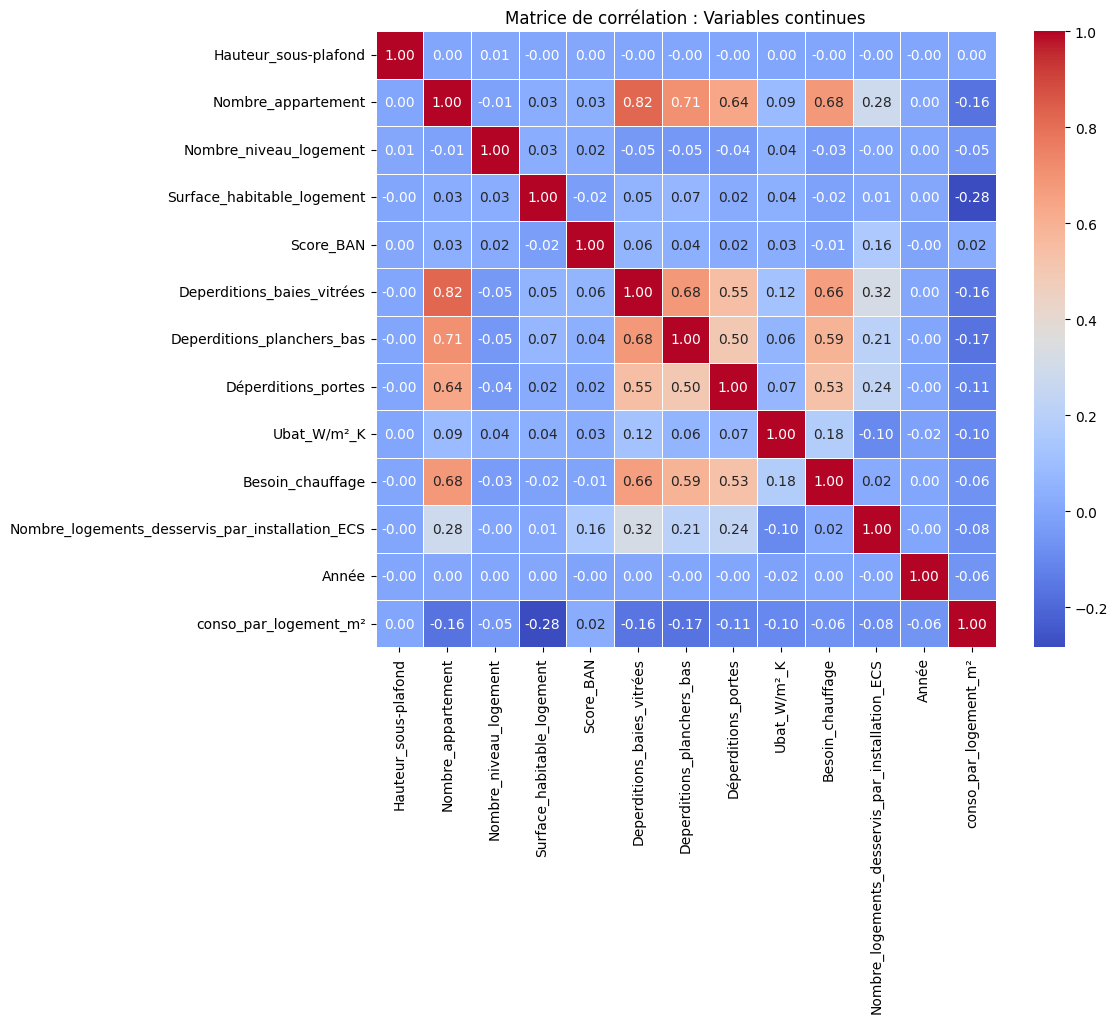

In [ ]:
# Sélectionner toutes les colonnes continues (float et int) du DataFrame
colonnes_continues = new.select_dtypes(include=['float', 'int'])

# Calculer la matrice de corrélation pour ces colonnes continues
corr_matrice = colonnes_continues.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrice, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation : Variables continues")
plt.show()


#### Traitement des valeurs manquantes
On fait l’hypothèse que les logements situés à une même adresse sont relativement similaires en termes de caractéristiques de bâtiment et d’équipements.

d'abord les qualitatives

In [ ]:
# Identifier les colonnes qualitatives (object ou category)
colonnes_qualitatives = new.select_dtypes(include=['object', 'category']).columns

# Boucle sur chaque colonne qualitative
for colonne in colonnes_qualitatives:
    # Grouper par adresse et calculer le mode pour chaque adresse
    mode_par_adresse = (
        new.groupby("Adresse")[colonne]
        .apply(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
    )

    # Créer une colonne temporaire avec les modes par adresse
    new["Mode_Adresse_Temp"] = new["Adresse"].map(mode_par_adresse)

    # Remplacer les NaN dans la colonne par le mode correspondant à l'adresse
    new[colonne].fillna(new["Mode_Adresse_Temp"], inplace=True)

    # Supprimer la colonne temporaire
    new.drop(columns=["Mode_Adresse_Temp"], inplace=True)

    # Si des NaN persistent (aucune valeur valide pour l'adresse), remplacer par le mode global
    if new[colonne].isna().any():
        mode_global = new[colonne].mode().iloc[0] if not new[colonne].mode().empty else pd.NA
        new[colonne].fillna(mode_global, inplace=True)

# Afficher un message de confirmation
print("Traitement des NaN terminé pour les variables qualitatives.")


In [ ]:
new.isna().sum()

,0
Type_bâtiment,0
Type_installation_ECS_(général),0
Hauteur_sous-plafond,0
Nombre_appartement,260231
Nombre_niveau_logement,50771
Surface_habitable_logement,47364
Classe_inertie_bâtiment,0
Classe_altitude,0
Zone_climatique_,0
Score_BAN,0


Ensuite les continues

In [ ]:
conti = ["Surface_habitable_logement","Deperditions_baies_vitrées","Deperditions_planchers_bas","Besoin_chauffage","Déperditions_portes","conso_par_logement_m²"

        ]
discrete = ["Nombre_niveau_logement","Nombre_appartement","Nombre_logements_desservis_par_installation_ECS"]

In [ ]:
def traiter_valeurs_manquantes(data, colonnes_continues, colonnes_discretes):

    # Fonction pour remplacer les NaN des colonnes continues par la moyenne
    def remplacer_colonne_continue(colonne, colonne_adresse="Adresse"):
        moyenne_globale = colonne.mean()
        colonne_remplie = colonne.copy()
        for adresse, groupe in data.groupby(colonne_adresse):
            moyenne_par_adresse = groupe[colonne.name].mean()
            if pd.notna(moyenne_par_adresse):
                colonne_remplie.loc[groupe.index] = colonne_remplie.loc[groupe.index].fillna(moyenne_par_adresse)
        return colonne_remplie.fillna(moyenne_globale)

    # Fonction pour remplacer les NaN des colonnes discrètes par la mode
    def remplacer_colonne_discrete(colonne, colonne_adresse="Adresse"):
        mode_globale = colonne.mode().iloc[0] if not colonne.mode().empty else np.nan
        colonne_remplie = colonne.copy()
        for adresse, groupe in data.groupby(colonne_adresse):
            mode_par_adresse = groupe[colonne.name].mode()
            mode_par_adresse = mode_par_adresse.iloc[0] if not mode_par_adresse.empty else np.nan
            colonne_remplie.loc[groupe.index] = colonne_remplie.loc[groupe.index].fillna(mode_par_adresse)
        return colonne_remplie.fillna(mode_globale)

    # Traiter les colonnes continues
    for colonne in colonnes_continues:
        if colonne in data.columns:
            data[colonne] = remplacer_colonne_continue(data[colonne])

    # Traiter les colonnes discrètes
    for colonne in colonnes_discretes:
        if colonne in data.columns:
            data[colonne] = remplacer_colonne_discrete(data[colonne])

    return data


# Appliquer le traitement
new = traiter_valeurs_manquantes(new, conti, discrete)


In [ ]:
#retrait de l'adresse qui n'est plus necessaire
new.drop(columns = "Adresse", inplace = True)

In [ ]:
# créer un nouveau fichier pour éviter de refaire les étapes du dessus
new.to_csv(path2, index=False)

In [ ]:
chunksize = 10000

all_chunks = []

for chunk in pd.read_csv(path2, chunksize=chunksize):
  all_chunks.append(chunk)

reduit_conso = pd.concat(all_chunks)

#### Visualisation de la consommation en fonction de certaines variables explicatives

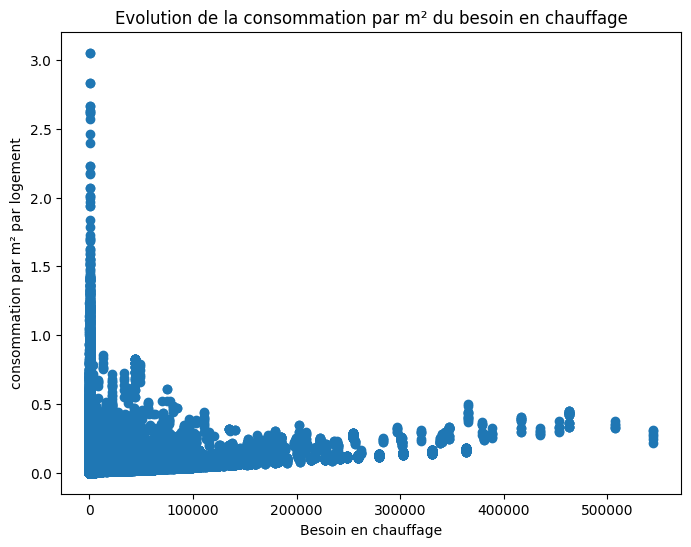

In [ ]:
# Variable continue 1 : 'x_variable'
# Variable continue 2 : 'y_variable'
plt.figure(figsize=(8, 6))
plt.scatter(reduit_conso["Besoin_chauffage"],reduit_conso["conso_par_logement_m²"])
plt.xlabel("Besoin en chauffage")
plt.ylabel("consommation par m² par logement")
plt.title("Evolution de la consommation par m² du besoin en chauffage")
plt.show()


<ipython-input-26-e6276452f3a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


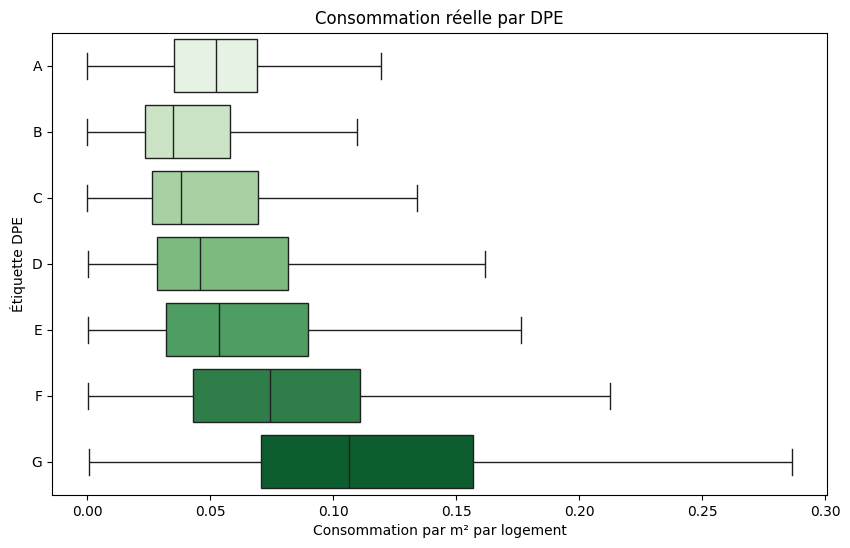

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="conso_par_logement_m²",
    y="Etiquette_DPE",
    data=reduit_conso,
    palette="Greens",
    showfliers=False
)
plt.title("Consommation réelle par DPE")
plt.xlabel("Consommation par m² par logement")
plt.ylabel("Étiquette DPE")
plt.show()


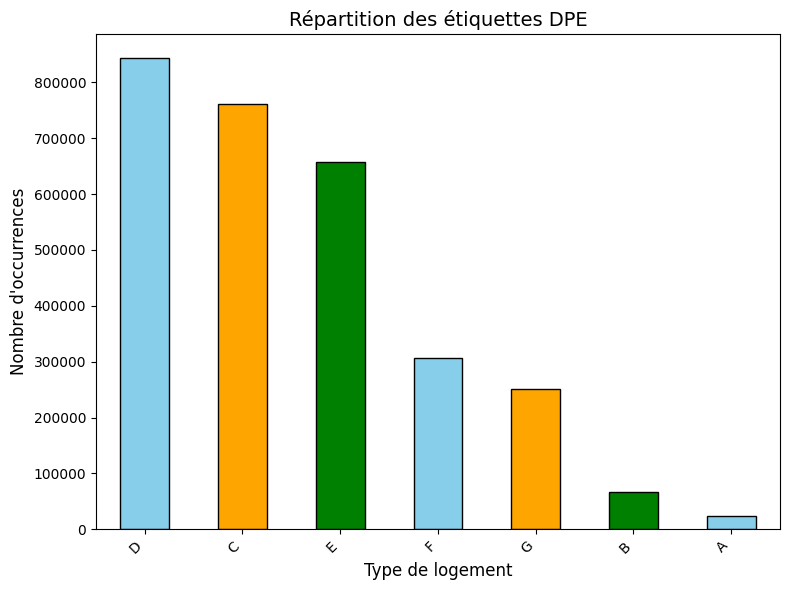

In [ ]:
repatition_bat = reduit_conso["Etiquette_DPE"].value_counts()
# Création du diagramme en bâtons
plt.figure(figsize=(8, 6))
repatition_bat.plot(kind='bar', color=['skyblue', 'orange', 'green'], edgecolor='black')

# Ajout de titres et labels
plt.title("Répartition des étiquettes DPE", fontsize=14)
plt.xlabel("Type de logement", fontsize=12)
plt.ylabel("Nombre d'occurrences", fontsize=12)

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Affichage du graphique
plt.show()

<ipython-input-29-70fd2e68c548>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


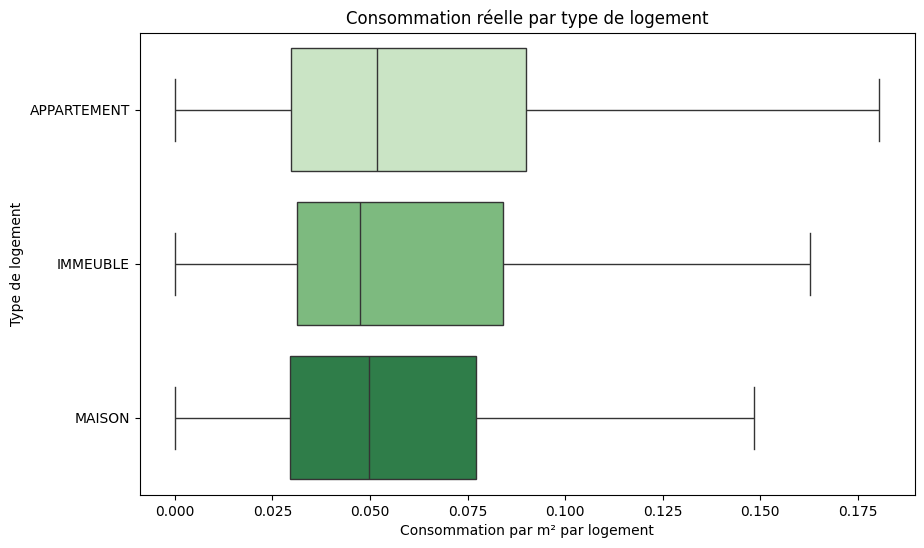

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="conso_par_logement_m²",
    y="Type_bâtiment",
    data=reduit_conso,
    palette="Greens",
    showfliers=False
)
plt.title("Consommation réelle par type de logement")
plt.xlabel("Consommation par m² par logement")
plt.ylabel("Type de logement")
plt.show()



<ipython-input-30-e25945bf1ff2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


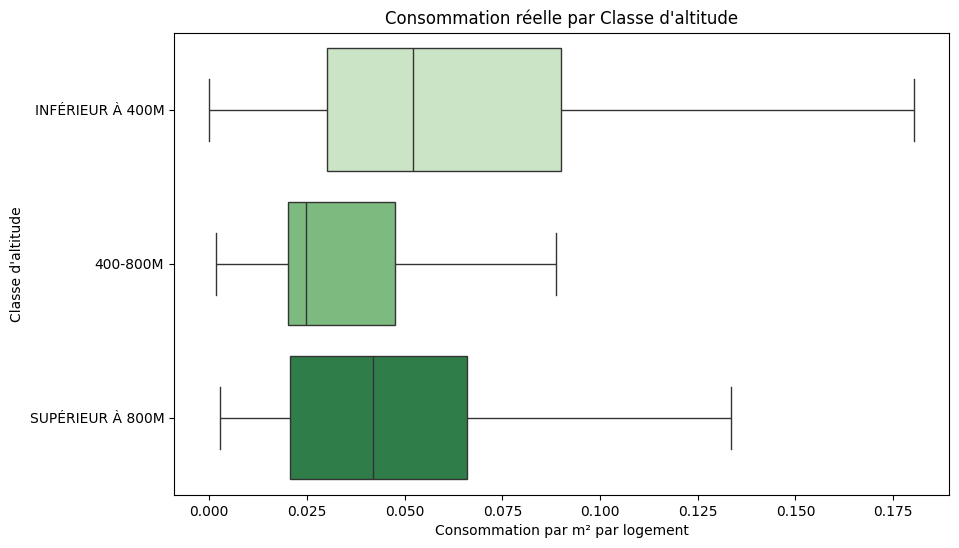

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="conso_par_logement_m²",
    y="Classe_altitude",
    data=reduit_conso,
    palette="Greens",
    showfliers=False
)
plt.title("Consommation réelle par Classe d'altitude")
plt.xlabel("Consommation par m² par logement")
plt.ylabel("Classe d'altitude")
plt.show()

#### Régression linéaire multiple pour prédire la consommation par m²

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sélectionner la variable cible et les variables explicatives
variable_cible = reduit_conso["conso_par_logement_m²"].values.reshape(-1, 1)  # Reshape pour StandardScaler
variables_explicatives = pd.get_dummies(reduit_conso.drop("conso_par_logement_m²", axis=1), drop_first=True)

# Standardisation des variables explicatives
standardiseur_X = StandardScaler()
variables_explicatives_normalisees = standardiseur_X.fit_transform(variables_explicatives)

# Standardisation de la variable cible
standardiseur_y = StandardScaler()
variable_cible_normalisee = standardiseur_y.fit_transform(variable_cible)

# Ajouter une constante pour l'interception
variables_explicatives_normalisees = sm.add_constant(variables_explicatives_normalisees)

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(
    variables_explicatives_normalisees, variable_cible_normalisee,
    test_size=0.2, random_state=42
)

# Ajuster le modèle avec statsmodels
modele_regression = sm.OLS(y_train, X_train).fit()

# Faire des prédictions
predictions_normalisees = modele_regression.predict(X_test)

# Revenir à l'échelle originale de y pour les prédictions
predictions_originales = standardiseur_y.inverse_transform(predictions_normalisees.reshape(-1, 1))
valeurs_reelles = standardiseur_y.inverse_transform(y_test)

# Évaluer le modèle avec l'erreur quadratique moyenne
mse = mean_squared_error(valeurs_reelles, predictions_originales)
rmse = np.sqrt(mse)
R2 = r2_score(valeurs_reelles, predictions_originales)

print(f"Erreur quadratique moyenne (RMSE) : {rmse}")

# 1. Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(valeurs_reelles, predictions_originales, label="Prédictions")
plt.plot(
    [valeurs_reelles.min(), valeurs_reelles.max()],
    [valeurs_reelles.min(), valeurs_reelles.max()],
    color="red", linestyle="--", label="Prédictions parfaites"
)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Graphique des Prédictions vs Valeurs Réelles")
plt.legend()
plt.show()

# 2. Graphique des résidus
residus = valeurs_reelles - predictions_originales
plt.figure(figsize=(8, 6))
plt.scatter(predictions_originales, residus, alpha=0.5, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Prédictions (y_pred)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.title("Graphique des Résidus")
plt.show()

<Figure size 1000x600 with 0 Axes>

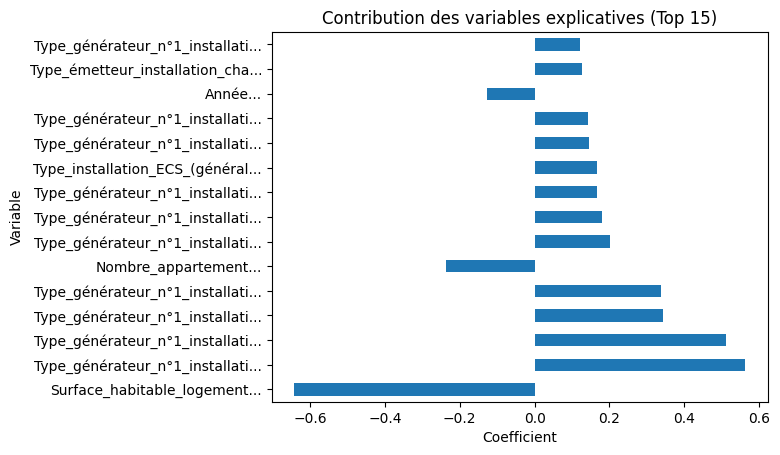

In [ ]:
# Extraction des coefficients
coefficients = pd.DataFrame({
    "Variable": ["Constante"] + list(variables_explicatives.columns),
    "Coefficient": modele_regression.params
}).sort_values(by="Coefficient", key=abs, ascending=False)


# Raccourcir les noms des variables directement dans le DataFrame
coefficients["Variable"] = coefficients["Variable"].str.slice(0, 30) + "..."

# Visualisation des coefficients
plt.figure(figsize=(10, 6))
coefficients.head(15).set_index("Variable").plot(kind="barh", legend=False)
plt.title("Contribution des variables explicatives (Top 15)")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.show()

#### Random forest pour prédire la conso par m²

Erreur quadratique moyenne (RMSE) : 0.008869852086616998
Coefficient de détermination (R²) : 0.9304449593741857


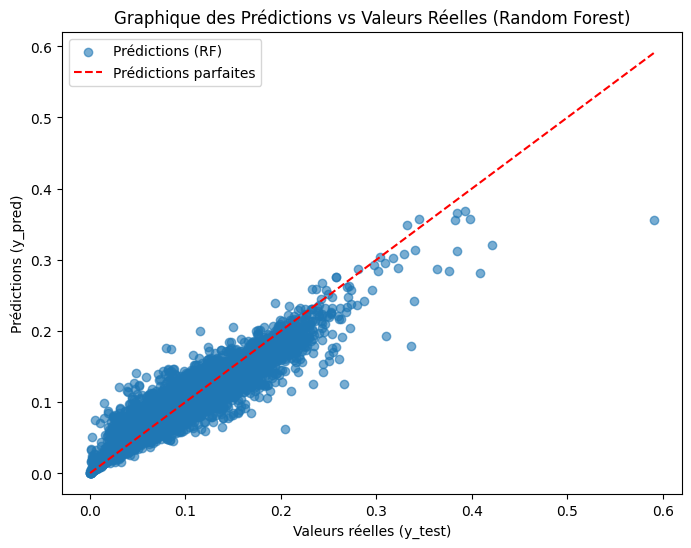

<Figure size 1000x600 with 0 Axes>

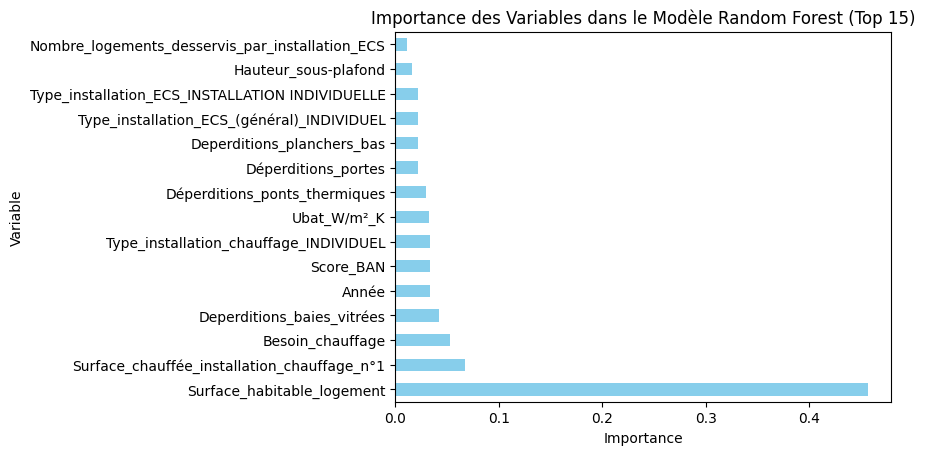

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Diviser les données en train/test (on reprend X_train, X_test, y_train, y_test déjà standardisés du LR multiple)
X_train_rf = X_train[:, 1:]  # Retirer la constante pour Random Forest
X_test_rf = X_test[:, 1:]

# Ajuster le modèle Random Forest
modele_rf = RandomForestRegressor(
    n_estimators=100,  # Nombre d'arbres dans la forêt
    max_depth=None,    # Profondeur maximale des arbres
    random_state=42,
    n_jobs=-1          # Utiliser tous les cœurs disponibles pour accélérer
)
modele_rf.fit(X_train_rf, y_train.ravel())

# Faire des prédictions
predictions_rf_normalisees = modele_rf.predict(X_test_rf)

# Revenir à l'échelle originale de y pour les prédictions
predictions_rf_originales = standardiseur_y.inverse_transform(predictions_rf_normalisees.reshape(-1, 1))
valeurs_reelles_rf = standardiseur_y.inverse_transform(y_test)

# Évaluer les performances du modèle
mse_rf = mean_squared_error(valeurs_reelles_rf, predictions_rf_originales)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(valeurs_reelles_rf, predictions_rf_originales)

print(f"Erreur quadratique moyenne (RMSE) : {rmse_rf}")
print(f"Coefficient de détermination (R²) : {r2_rf}")

# 1. Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(valeurs_reelles_rf, predictions_rf_originales, label="Prédictions (RF)", alpha=0.6)
plt.plot(
    [valeurs_reelles_rf.min(), valeurs_reelles_rf.max()],
    [valeurs_reelles_rf.min(), valeurs_reelles_rf.max()],
    color="red", linestyle="--", label="Prédictions parfaites"
)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Prédictions (y_pred)")
plt.title("Graphique des Prédictions vs Valeurs Réelles (Random Forest)")
plt.legend()
plt.show()

# 2. Importance des variables
importances = pd.DataFrame({
    "Variable": variables_explicatives.columns,
    "Importance": modele_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualisation des importances des variables
plt.figure(figsize=(10, 6))
importances.head(15).set_index("Variable").plot(kind="barh", legend=False, color="skyblue")
plt.title("Importance des Variables dans le Modèle Random Forest (Top 15)")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()


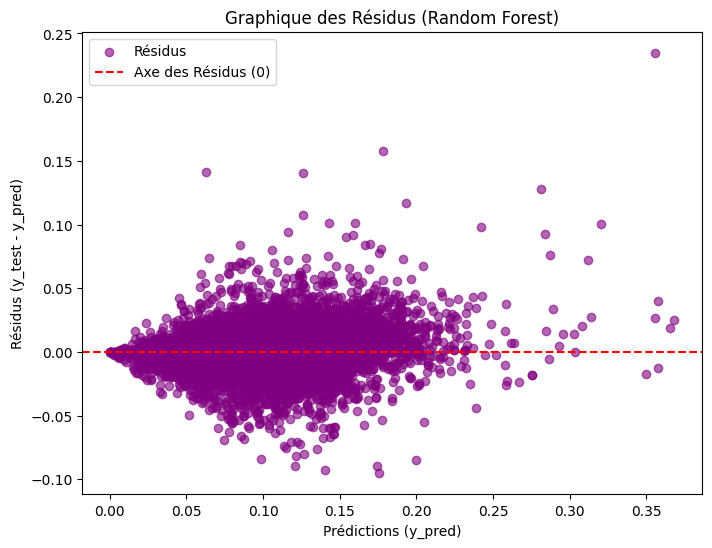

In [ ]:
# Calcul des résidus
residus_rf = valeurs_reelles_rf - predictions_rf_originales

# Graphique des résidus
plt.figure(figsize=(8, 6))
plt.scatter(predictions_rf_originales, residus_rf, alpha=0.6, color="purple", label="Résidus")
plt.axhline(0, color="red", linestyle="--", label="Axe des Résidus (0)")
plt.xlabel("Prédictions (y_pred)")
plt.ylabel("Résidus (y_test - y_pred)")
plt.title("Graphique des Résidus (Random Forest)")
plt.legend()
plt.show()


#### Random forest sans la DPE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données
variables_explicatives = pd.get_dummies(
    reduit_conso.drop(["conso_par_logement_m²", "Etiquette_DPE"], axis=1), drop_first=True
)

# Standardisation des variables explicatives
standardiseur_X = StandardScaler()
variables_explicatives_normalisees = standardiseur_X.fit_transform(variables_explicatives)

# Variable cible : consommation par m² et étiquette DPE
variable_cible = reduit_conso[["conso_par_logement_m²", "Etiquette_DPE"]].copy()

# Standardisation de la consommation par m²
standardiseur_y = StandardScaler()
variable_cible["conso_par_logement_m²"] = standardiseur_y.fit_transform(
    variable_cible["conso_par_logement_m²"].values.reshape(-1, 1)
)

# Diviser les données en train/test
X_train, X_test, y_train, y_test = train_test_split(
    variables_explicatives_normalisees, variable_cible.values,
    test_size=0.2, random_state=42
)

# Entraînement du modèle Random Forest
modele_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modele_rf.fit(X_train, y_train[:, 0])  # Entraîner uniquement sur la consommation

# Faire des prédictions
predictions_conso_normalisees_rf = modele_rf.predict(X_test)

# Revenir à l'échelle originale pour la consommation par m²
predictions_conso_par_m2_rf = standardiseur_y.inverse_transform(
    predictions_conso_normalisees_rf.reshape(-1, 1)
)

# Conserver les étiquettes DPE réelles associées
predictions_rf = np.hstack((
    predictions_conso_par_m2_rf,  # Prédictions consommation
    y_test[:, 1].reshape(-1, 1)  # Étiquettes DPE réelles
))

# Évaluer le modèle
mse_rf = mean_squared_error(
    standardiseur_y.inverse_transform(y_test[:, 0].reshape(-1, 1)), predictions_conso_par_m2_rf
)
r2_rf = r2_score(
    standardiseur_y.inverse_transform(y_test[:, 0].reshape(-1, 1)), predictions_conso_par_m2_rf
)

# Afficher les métriques
print(f"Random Forest - RMSE : {np.sqrt(mse_rf)}")
print(f"Random Forest - R² : {r2_rf}")

# stockage du resultat
results_rf = pd.DataFrame({
    "True_DPE": predictions_rf[:, 1],  # Étiquette DPE réelle
    "Pred_Conso_par_m²": predictions_rf[:, 0].flatten(),  # Consommation prédite
    "True_Conso_par_m²": standardiseur_y.inverse_transform(y_test[:, 0].reshape(-1, 1)).flatten()  # Consommation réelle
})


Random Forest - RMSE : 0.00888861053302983
Random Forest - R² : 0.9301504507032531


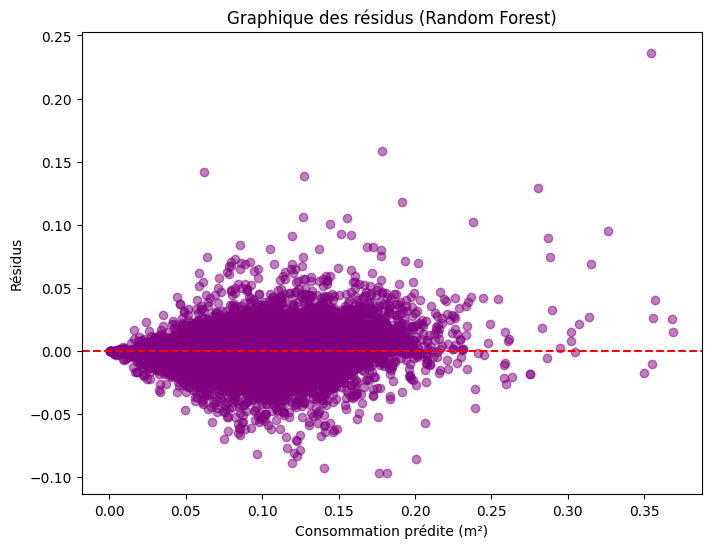

In [ ]:
# Graphique des résidus
residus_rf = results_rf["True_Conso_par_m²"] - results_rf["Pred_Conso_par_m²"]
plt.figure(figsize=(8, 6))
plt.scatter(results_rf["Pred_Conso_par_m²"], residus_rf, alpha=0.5, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Consommation prédite (m²)")
plt.ylabel("Résidus")
plt.title("Graphique des résidus (Random Forest)")
plt.show()

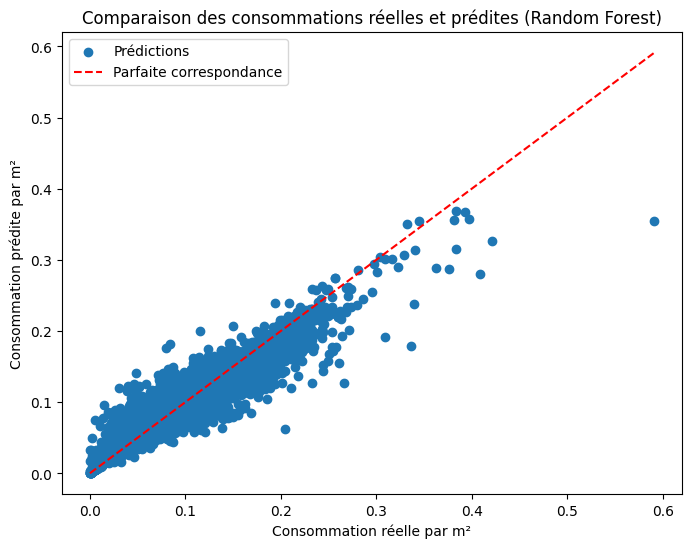

In [ ]:
# Comparaison des consommations réelles et prédites
plt.figure(figsize=(8, 6))
plt.scatter(results_rf["True_Conso_par_m²"], results_rf["Pred_Conso_par_m²"], label="Prédictions")
plt.plot(
    [results_rf["True_Conso_par_m²"].min(), results_rf["True_Conso_par_m²"].max()],
    [results_rf["True_Conso_par_m²"].min(), results_rf["True_Conso_par_m²"].max()],
    color="red", linestyle="--", label="Parfaite correspondance"
)
plt.xlabel("Consommation réelle par m²")
plt.ylabel("Consommation prédite par m²")
plt.title("Comparaison des consommations réelles et prédites (Random Forest)")
plt.legend()
plt.show()

<ipython-input-66-219eaa07dcb6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


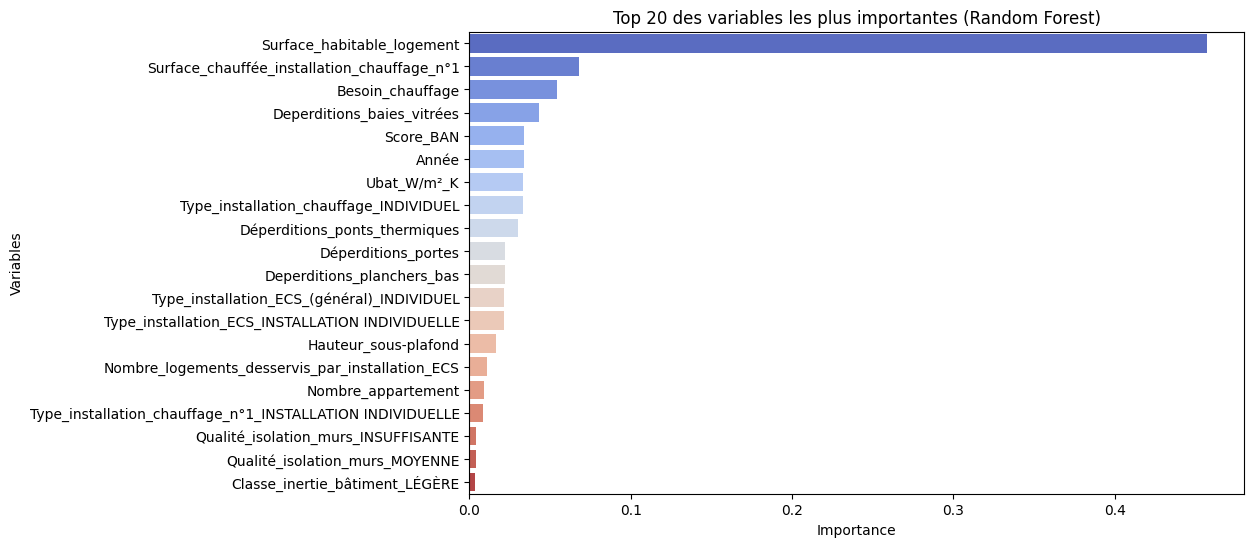

In [ ]:
# Importance des variables
importances = modele_rf.feature_importances_
importance_variables_rf = pd.DataFrame({
    "Variable": variables_explicatives.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualisation des variables importantes
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance", y="Variable", data=importance_variables_rf.head(20),
    palette="coolwarm", orient="h"
)
plt.title("Top 20 des variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()


<ipython-input-67-be69ce7a9b1e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-67-be69ce7a9b1e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


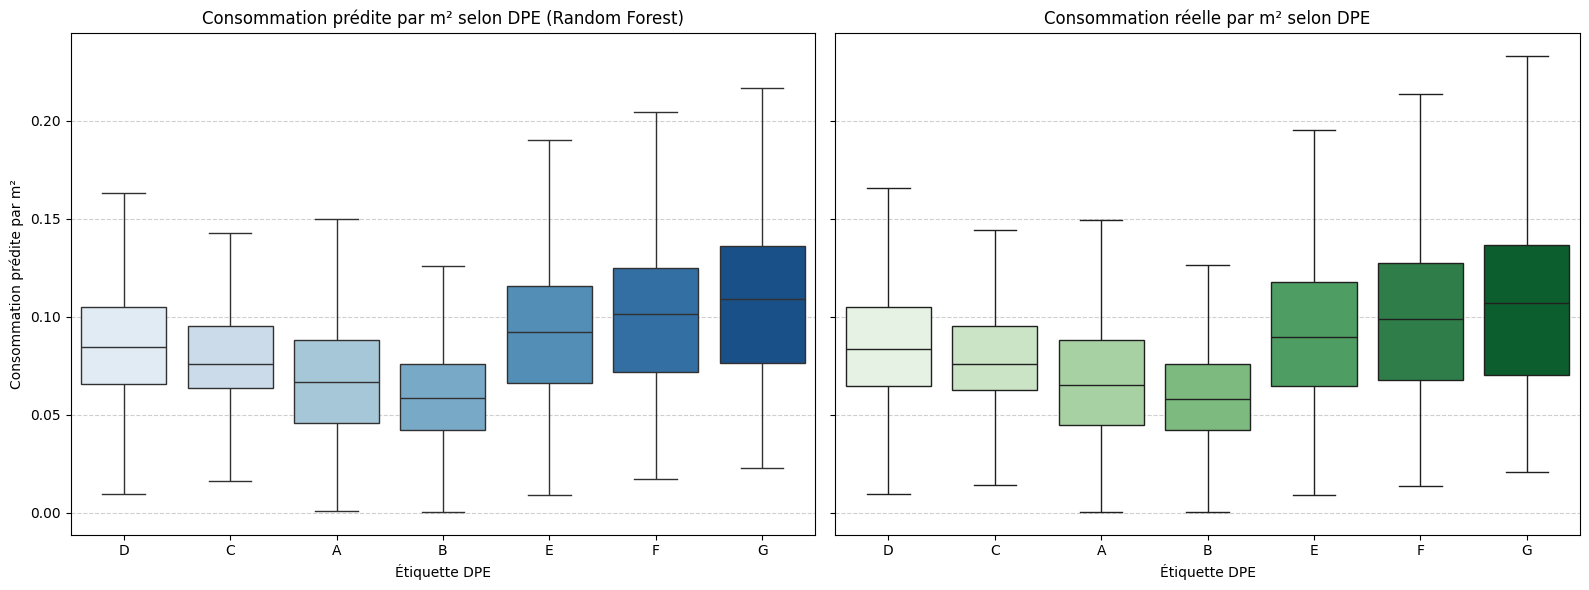

In [ ]:
# Dimensions de la figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Graphique 1 : Consommation prédite par DPE
sns.boxplot(
    x="True_DPE",
    y="Pred_Conso_par_m²",
    data=results_rf,
    palette="Blues",
    showfliers=False,
    ax=axes[0]
)
axes[0].set_title("Consommation prédite par m² selon DPE (Random Forest)")
axes[0].set_xlabel("Étiquette DPE")
axes[0].set_ylabel("Consommation prédite par m²")
axes[0].grid(axis="y", linestyle="--", alpha=0.6)

# Graphique 2 : Consommation réelle par DPE
sns.boxplot(
    x="True_DPE",
    y="True_Conso_par_m²",
    data=results_rf,
    palette="Greens",
    showfliers=False,
    ax=axes[1]
)
axes[1].set_title("Consommation réelle par m² selon DPE")
axes[1].set_xlabel("Étiquette DPE")
axes[1].set_ylabel("Consommation réelle par m²")
axes[1].grid(axis="y", linestyle="--", alpha=0.6)

# Ajuster les espacements
plt.tight_layout()
plt.show()

Le DPE ne semble pas vraiment influer les prédictions de la consommations réelles. Cela peut également expliquer les résultats sur la consommation en fonction du type de DPE, obtenu à l'étape de visualisation